Original Source from https://github.com/mrakelinggar/data-stuffs

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

from sklearn.cluster import KMeans

In [48]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [49]:
img = cv.imread("img/img_1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("img/img_2.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

#show_img_compar(img, img_2)

### Method 3 - N  most common color

In [50]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)

In [51]:
clt = KMeans(n_clusters=3)
clt.fit(img.reshape(-1, 3))

clt_1 = clt.fit(img.reshape(-1, 3))
#show_img_compar(img, palette_perc(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
#show_img_compar(img_2, palette_perc(clt_2))

In [52]:
def resample(labels, centers):
    resamp = []
    #what is the label for this pixel
    for p in labels:
        #put the color for that label into the resample 
        resamp.append(centers[p])
    #convert the list to np array of original shape (w, h, & 3 for rgb)   res = np.array(resamp).reshape((dim[1], dim[0], 3)
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    #show the image with rgb values between 0 and 1 
    plt.imshow(res/255.0)


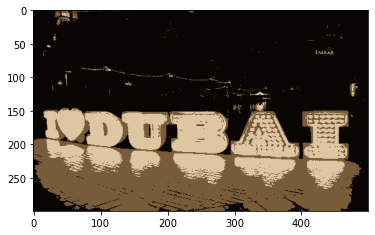

In [53]:
resample(clt_1.labels_, clt_1.cluster_centers_)

TypeError: Image data of dtype object cannot be converted to float

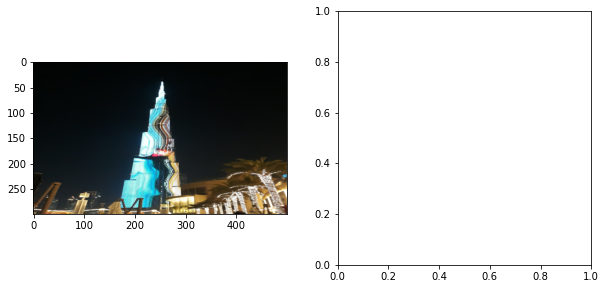

In [54]:
clt2 = KMeans(n_clusters=3)
clt2.fit(img.reshape(-1, 3))

clt_2 = clt2.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_2))

In [ ]:
#color idx is the color index to isolate and
# fill is the color to fill in everything that is not that color 
def isolate_color(labels, centers, color_idx, fill idx):
    resamp - []
    #what is the label for this pixel
    for p in labels:
        if p -- color_idx:
            #put the color for that label into the resample 
            resamp.append(centers[p])
        else:
            resamp.append(centers[fill_idx])
    #convert the list to np array of original shape (w, h, & 3 for rgb)   res = np.array(resamp).reshape((dim[1], dim[0], 3))
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    #show the image with rgb values between 0 and 1 
    plt.imshow(res/255.0)
